In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [24]:
df=pd.read_csv('height-weight.csv')

In [25]:
df

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160
5,78,162
6,80,163
7,90,175
8,95,182
9,78,170


Text(0, 0.5, 'Height')

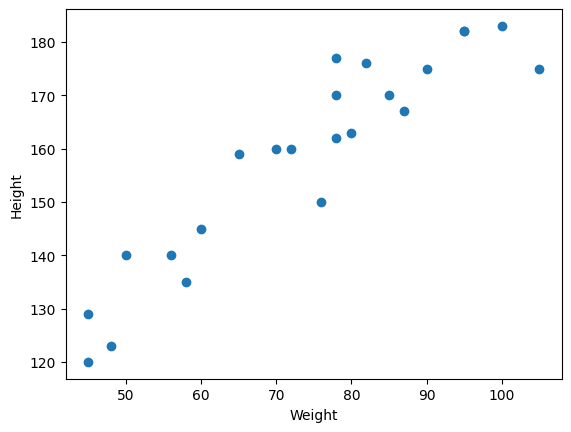

In [26]:
plt.scatter(df['Weight'],df['Height'])
plt.xlabel('Weight')
plt.ylabel('Height')

In [27]:
df.corr() # Positively correlated

,Weight,Height
Weight,1.000000,0.931142
Height,0.931142,1.000000


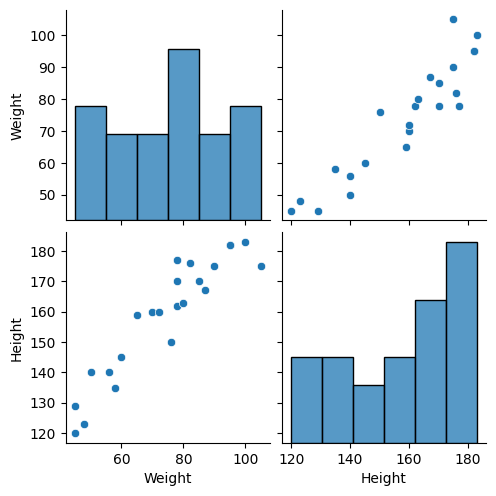

In [28]:
import seaborn as sns
sns.pairplot(df)

In [29]:
# Dependent feature - Height
# Independent feature - Weight
X = df['Weight']
type(X)

pandas.core.series.Series

*Independent features should be in DataFrame or 2-D array*

In [30]:
# DataFrame creation
X = df[['Weight']]
type(X)

pandas.core.frame.DataFrame

*Dependent feature can be in series of 1-D array. No issue!*

In [31]:
y = df['Height']
type(y)

pandas.core.series.Series

# *Train, Test split*

In [32]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In the **train_test_split** function in scikit-learn, the **random_state** parameter controls the random number generator used to shuffle the data before splitting it into training and testing sets. Setting a specific value (like 0, 42, or any integer) ensures **the same split is obtained each time the code is run, making the results reproducible.** Without a specific value (or random_state=None), the split will vary each time the code is executed.

# *Standardization*

Standardization is used in independent features only as gradient decent is only applied on independent features. After standardization, unit will be same not different.

In [33]:
from sklearn.preprocessing import StandardScaler

In [34]:
scaler = StandardScaler()

In [35]:
X_train = scaler.fit_transform(X_train)

In [36]:
X_train

array([[-0.87662801],
       [ 1.66773133],
       [ 0.33497168],
       [-1.48242785],
       [ 1.36483141],
       [-1.6641678 ],
       [-0.75546804],
       [-0.1496682 ],
       [ 0.21381171],
       [-1.36126788],
       [-0.99778797],
       [-0.02850823],
       [ 1.06193149],
       [ 0.57729161],
       [ 0.75903157],
       [ 0.88019153],
       [ 0.45613165]])

In [37]:
X_test = scaler.transform(X_test)

In [38]:
X_test

array([[ 0.33497168],
       [ 0.33497168],
       [-1.6641678 ],
       [ 1.36483141],
       [-0.45256812],
       [ 1.97063125]])

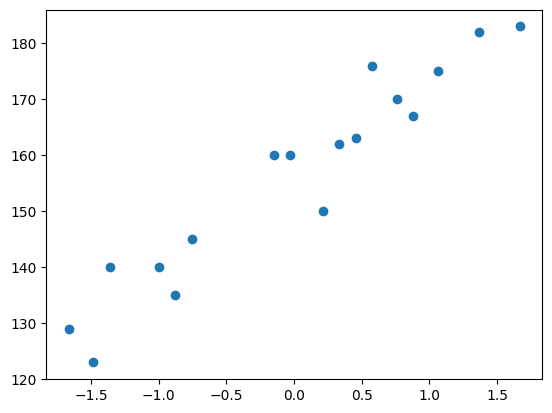

In [39]:
# After scale down
plt.scatter(X_train,y_train)

# *Applying Simple Linear Regression*

In [40]:
from sklearn.linear_model import LinearRegression

In [41]:
regression = LinearRegression(n_jobs=-1)

In [42]:
regression.fit(X_train,y_train)

LinearRegression(n_jobs=-1)

In [43]:
# slope (m/Beta 1)
regression.coef_

array([17.2982057])

In [44]:
# Intercept (c/Beta 0)
regression.intercept_

np.float64(156.47058823529412)

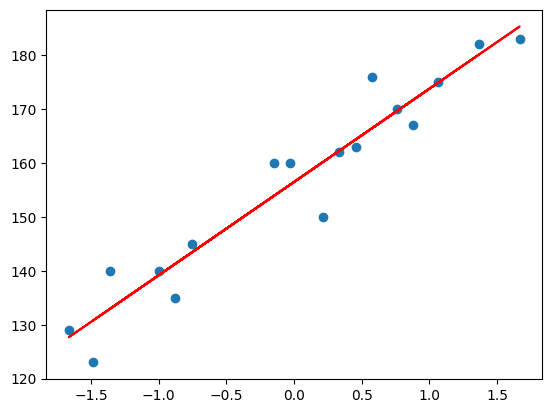

In [45]:
# plot best fit line for training data
plt.scatter(X_train,y_train)
plt.plot(X_train,regression.predict(X_train),'r')

# *Prediction for test data*

* predicted height output = intercept_ + coef_ * weights
* => y_pred = 156.470 + 17.29 * X_test


then we compare **y_test** & **y_pred** 

In [46]:
y_pred = regression.predict(X_test)

In [47]:
y_pred

array([162.26499721, 162.26499721, 127.68347133, 180.07972266,
       148.64197186, 190.55897293])

# *Performance Metrics*

In [48]:
# performance metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [49]:
mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
rmse = np.sqrt(mse)

In [50]:
print(mse)
print(mae)
print(rmse)

114.84069295228699
9.66512588679501
10.716374991212605


In [51]:
# R-Square 
from sklearn.metrics import r2_score

score = r2_score(y_test,y_pred)

In [52]:
print(score)

0.7360826717981276


In [53]:
# Adjusted R-Square 
adj_r2 = 1-(1-score)*((len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))

In [54]:
X_test.shape

(6, 1)

In [55]:
adj_r2

0.6701033397476595

# *Predict for new data*

In [56]:
# X_test (2-D format as Independent variable)
new_weight = [[72]] 

# Standardization
new_weight_scaled = scaler.transform(new_weight)

# Ready for prediction
# y-pred
regression.predict(new_weight_scaled) 

c:\Users\Ankan Basak\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([155.97744705])